<a href="https://colab.research.google.com/github/AdnanBayu/LSTM-Flex-Sensor/blob/main/Tensorflow_LSTM_Flex_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [ ]:
# @title <p>Essential Import
import os, shutil, json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np, pandas as pd, random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
import warnings
import gdown
warnings.filterwarnings("ignore")

In [ ]:
# @title <p> Download Data Sensor Real
url = 'https://drive.google.com/file/d/1IXZhhHKSZFOf_nJg2J6ZYJGUqvU_Ffvk/view?usp=sharing'
output_path = 'data-real.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1IXZhhHKSZFOf_nJg2J6ZYJGUqvU_Ffvk
To: /content/data-real.zip
100%|██████████| 1.81M/1.81M [00:00<00:00, 52.1MB/s]


'data-real.zip'

In [ ]:
# @title <p> Download Data Real Config Real
url = 'https://drive.google.com/file/d/1zFfUlMn9aCm9Ngvj3ENKBo3KaK6apNSB/view?usp=sharing'
output_path = 'data-real-config.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1zFfUlMn9aCm9Ngvj3ENKBo3KaK6apNSB
To: /content/data-real-config.zip
100%|██████████| 3.50k/3.50k [00:00<00:00, 9.49MB/s]


'data-real-config.zip'

In [ ]:
# @title <p> Assign file path
DATA_DIR = 'data'
CONFIG_DIR = 'data-real-config/config'

if not os.path.isdir(DATA_DIR) :
  !unzip data-real.zip &> /dev/null

if not os.path.isdir(CONFIG_DIR) :
  !unzip data-real-config.zip &> /dev/null

In [ ]:
# @title <p> Formatting Data Real
columns = [f'finger{n}' for n in range(1, 6)] + ['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z', 'label', 'name', 'file']
data_arr = []
# exclude = ["anis", "zalfa"]

def convert_data_str_int(data):
    return [float(x) for x in data.split(',')]

#read each file by alphabet name
for name in os.listdir(DATA_DIR):
  for letter in os.listdir(os.path.join(DATA_DIR,name)):
    for data_point in os.listdir(os.path.join(DATA_DIR,name,letter)):
      # if name not in exclude:
      data_path = os.path.join(DATA_DIR, name, letter, data_point)
      with open(data_path, 'r') as f:
        lines = f.readlines()
        lines = lines[-30:]
      for line in lines:
        data_arr.append(convert_data_str_int(line) + [letter] + [name] + [data_point])

In [ ]:
# @title <p> Create Dataframe
data_df = pd.DataFrame(data_arr, columns = columns)
data_df = data_df.drop(['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z'], axis=1)
data_df

,finger1,finger2,finger3,finger4,finger5,label,name,file
0,2901.0,2913.0,3760.0,3405.0,3071.0,o,alfa,o-5.txt
1,2898.0,2911.0,3865.0,3455.0,3071.0,o,alfa,o-5.txt
2,2917.0,2910.0,3824.0,3427.0,3071.0,o,alfa,o-5.txt
3,2902.0,2906.0,3762.0,3394.0,3071.0,o,alfa,o-5.txt
4,2901.0,2907.0,3750.0,3389.0,3071.0,o,alfa,o-5.txt
...,...,...,...,...,...,...,...,...
42610,3465.0,3631.0,3728.0,3695.0,2797.0,j,bayu,j-2.txt
42611,3466.0,3627.0,3712.0,3697.0,2785.0,j,bayu,j-2.txt
42612,3467.0,3631.0,3721.0,3693.0,2800.0,j,bayu,j-2.txt
42613,3462.0,3627.0,3714.0,3680.0,2798.0,j,bayu,j-2.txt


#DATA VISUALIZATION

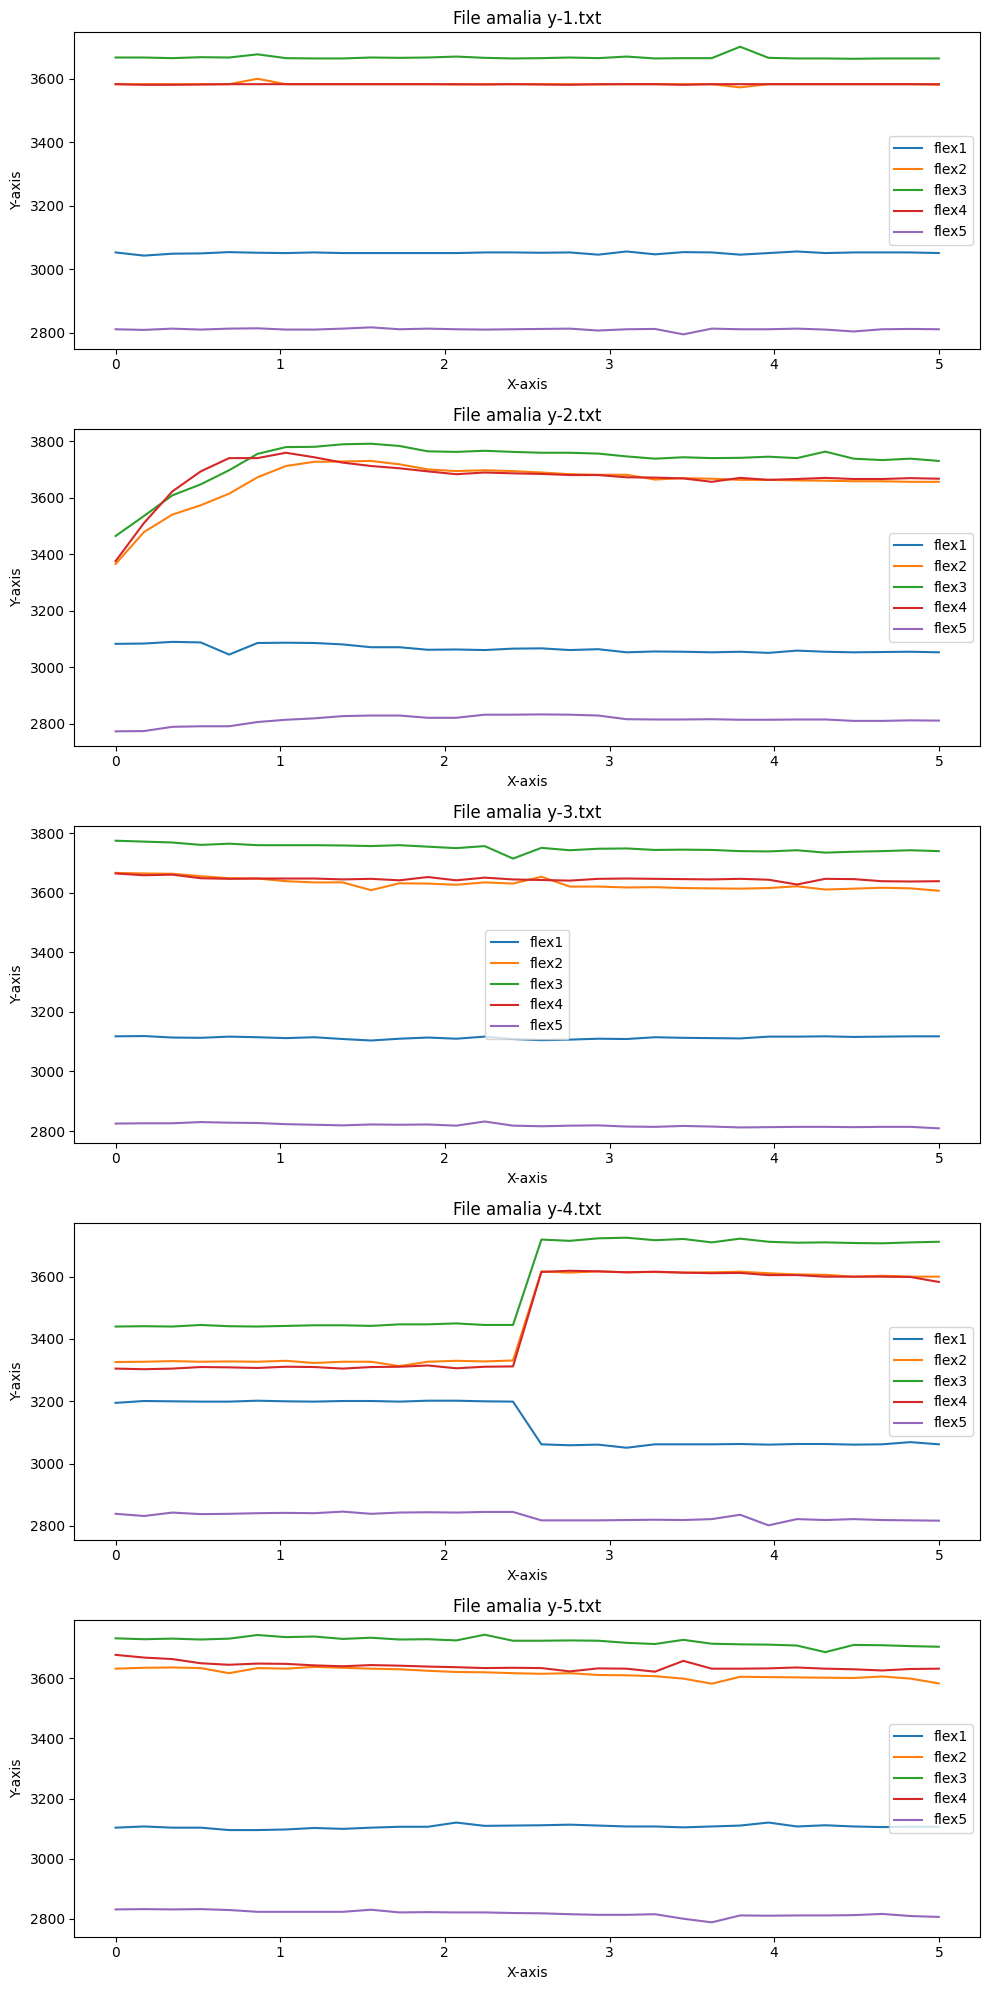

In [ ]:
# @title <p> Check Flex Sensor Data
PARTICIPANT_NAME = "amalia" #@param{type: 'string'}
LETTER_PRINT = "y" #@param{type: 'string'}
FILE_PRINT = [f'{LETTER_PRINT}-{n}.txt' for n in range(1,6)]

check_flex_viz = data_df[data_df['name'] == PARTICIPANT_NAME]
check_flex_viz = check_flex_viz[check_flex_viz['label'] == LETTER_PRINT]

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

# Loop through the data and axes to create subplots
for i, ax in enumerate(axes):
  if i < len(FILE_PRINT):
      file = FILE_PRINT[i]
      data_to_plot = check_flex_viz[check_flex_viz["file"] == file]

      num_points = data_to_plot.shape[0]
      time = np.linspace(0, 5, num_points)

      for i in range(5):
        ax.plot(time, data_to_plot.iloc[:,i], label=f'flex{i+1}')

      ax.set_title(f'File {PARTICIPANT_NAME} {file}')
      ax.set_xlabel('X-axis')
      ax.set_ylabel('Y-axis')
      ax.legend()
  else:
      ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()

# DATA CONFIG IMPORT

In [ ]:
# @title <p> Check txt File Contents
f = open(os.path.join(CONFIG_DIR, 'ade.txt'), 'r')
contents = f.read()
print(contents)

max of 1'st finger : 2718.0, 
min of 1'st finger : 2555.0, 
max of 2'st finger : 2735.0, 
min of 2'st finger : 2608.0, 
max of 3'st finger : 3711.0, 
min of 3'st finger : 3278.0, 
max of 4'st finger : 3275.0, 
min of 4'st finger : 3148.0, 
max of 5'st finger : 3066.0, 
min of 5'st finger : 2797.0, 



In [ ]:
# @title <p> Formatting Config Data
minmax_fingers = ['max_1',
           'min_1',
           'max_2',
           'min_2',
           'max_3',
           'min_3',
           'max_4',
           'min_4',
           'max_5',
           'min_5']
config_participants = [a for a in os.listdir(CONFIG_DIR)]
config_dict = {participant : {config_fingers : [] for config_fingers in minmax_fingers} for participant in config_participants}
config_dict_cleaned = {participant : {config_fingers : [] for config_fingers in minmax_fingers} for participant in config_participants}

#read each file by participant name
for name in os.listdir(CONFIG_DIR):
  data_path = os.path.join(CONFIG_DIR, name)
  with open(data_path, 'r') as f:
    content = f.read().splitlines()
    for i, finger in enumerate(minmax_fingers):
      data_line = float(content[i].split(':')[-1][:-2].strip())
      config_dict_cleaned[name][finger].append(data_line)

In [ ]:
# @title <p> Check Formatted Config Data
config_dict_cleaned['cahyan.txt']

{'max_1': [3664.0],
 'min_1': [3043.0],
 'max_2': [3718.0],
 'min_2': [3059.0],
 'max_3': [3805.0],
 'min_3': [3371.0],
 'max_4': [3730.0],
 'min_4': [3063.0],
 'max_5': [3113.0],
 'min_5': [2795.0]}

In [ ]:
# @title <p> Add Config Min-Max to DataFrame
for nc in minmax_fingers:
  data_df[nc] = data_df["name"].apply(lambda x: config_dict_cleaned[f"{x}.txt"][nc][0])

data_df

,finger1,finger2,finger3,finger4,finger5,label,name,file,max_1,min_1,max_2,min_2,max_3,min_3,max_4,min_4,max_5,min_5
0,2901.0,2913.0,3760.0,3405.0,3071.0,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
1,2898.0,2911.0,3865.0,3455.0,3071.0,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
2,2917.0,2910.0,3824.0,3427.0,3071.0,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
3,2902.0,2906.0,3762.0,3394.0,3071.0,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
4,2901.0,2907.0,3750.0,3389.0,3071.0,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42610,3465.0,3631.0,3728.0,3695.0,2797.0,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42611,3466.0,3627.0,3712.0,3697.0,2785.0,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42612,3467.0,3631.0,3721.0,3693.0,2800.0,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42613,3462.0,3627.0,3714.0,3680.0,2798.0,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0


# DATASET PREPROCESSING

In [ ]:
# @title <p> check data minimum and maximum value of each finger (not from config)
for col in columns[0:5]:
  min_val_act = data_df[col].min()
  max_val_act = data_df[col].max()
  print(f"--------------------------------------")
  print(f"min value of column {col}", min_val_act)
  print(f"max value of column {col}", max_val_act)
  print(f"--------------------------------------")

--------------------------------------
min value of column finger1 154.0
max value of column finger1 3766.0
--------------------------------------
--------------------------------------
min value of column finger2 2227.0
max value of column finger2 3875.0
--------------------------------------
--------------------------------------
min value of column finger3 2494.0
max value of column finger3 4095.0
--------------------------------------
--------------------------------------
min value of column finger4 2272.0
max value of column finger4 3863.0
--------------------------------------
--------------------------------------
min value of column finger5 2474.0
max value of column finger5 3426.0
--------------------------------------


In [ ]:
#  @title <p> Drop the weird value
for col in columns[0:5]:
  weird_value = data_df[data_df[col] <= 1000]
  data_df.drop(weird_value.index, inplace = True)

In [ ]:
# @title <p> Recheck data minimum and maximum value of each finger after drop weird value
for col in columns[0:5]:
  min_val_act = data_df[col].min()
  max_val_act = data_df[col].max()
  print(f"--------------------------------------")
  print(f"min value of column {col}", min_val_act)
  print(f"max value of column {col}", max_val_act)
  print(f"--------------------------------------")

--------------------------------------
min value of column finger1 2243.0
max value of column finger1 3766.0
--------------------------------------
--------------------------------------
min value of column finger2 2227.0
max value of column finger2 3875.0
--------------------------------------
--------------------------------------
min value of column finger3 2494.0
max value of column finger3 4095.0
--------------------------------------
--------------------------------------
min value of column finger4 2272.0
max value of column finger4 3863.0
--------------------------------------
--------------------------------------
min value of column finger5 2474.0
max value of column finger5 3426.0
--------------------------------------


In [ ]:
# @title <p> Flex data normalization
flex_cols = ["finger1", "finger2", "finger3", "finger4", "finger5"]

def do_normalize_flex(value, fingern):
  # config_max = value[f'max_{fingern[-1:]}']
  # config_min = value[f'min_{fingern[-1:]}']
  # flex_normalized = (value[fingern] - config_min)/(config_max - config_min)
  flex_normalized = (value[fingern] - 2200)/(4100 - 2200)   #consider using min 2200 and max 4100
  return round(flex_normalized, 3)

def norm_loc(x):
  global flex_cols
  for i in flex_cols:
    x[i] = do_normalize_flex(x, i)

  return x

df_normalized = data_df.apply(lambda x: norm_loc(x), axis=1)

df_normalized

,finger1,finger2,finger3,finger4,finger5,label,name,file,max_1,min_1,max_2,min_2,max_3,min_3,max_4,min_4,max_5,min_5
0,0.369,0.375,0.821,0.634,0.458,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
1,0.367,0.374,0.876,0.661,0.458,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
2,0.377,0.374,0.855,0.646,0.458,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
3,0.369,0.372,0.822,0.628,0.458,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
4,0.369,0.372,0.816,0.626,0.458,o,alfa,o-5.txt,2805.0,2679.0,2736.0,2629.0,3687.0,3315.0,3165.0,3163.0,2815.0,2813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42610,0.666,0.753,0.804,0.787,0.314,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42611,0.666,0.751,0.796,0.788,0.308,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42612,0.667,0.753,0.801,0.786,0.316,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0
42613,0.664,0.751,0.797,0.779,0.315,j,bayu,j-2.txt,3664.0,3043.0,3718.0,3059.0,3805.0,3371.0,3730.0,3063.0,3113.0,2795.0


In [ ]:
#  @title <p> Check if there's any value below 0
for col in columns[0:5]:
  respondent_error = df_normalized[df_normalized[col] < 0]

respondent_error

,finger1,finger2,finger3,finger4,finger5,label,name,file,max_1,min_1,max_2,min_2,max_3,min_3,max_4,min_4,max_5,min_5


In [ ]:
#  @title <p> Recheck data minimum and maximum value of each finger (not from config) after normalized
for col in columns[0:5]:
  min_val_act = df_normalized[col].min()
  max_val_act = df_normalized[col].max()
  print(f"--------------------------------------")
  print(f"min value of column {col}", min_val_act)
  print(f"max value of column {col}", max_val_act)
  print(f"--------------------------------------")

--------------------------------------
min value of column finger1 0.023
max value of column finger1 0.824
--------------------------------------
--------------------------------------
min value of column finger2 0.014
max value of column finger2 0.882
--------------------------------------
--------------------------------------
min value of column finger3 0.155
max value of column finger3 0.997
--------------------------------------
--------------------------------------
min value of column finger4 0.038
max value of column finger4 0.875
--------------------------------------
--------------------------------------
min value of column finger5 0.144
max value of column finger5 0.645
--------------------------------------


In [ ]:
# @title <p> Check total row for each label
df_normalized["label"].value_counts()

,count
label,
e,1667
r,1650
o,1650
h,1650
d,1650
k,1650
f,1650
b,1650
i,1650


In [ ]:
# @title <p> Remove the unwanted label
df_normalized = df_normalized[df_normalized['label'] != 'B']
df_normalized["label"].value_counts().sort_index()

,count
label,
a,1632
b,1650
c,1650
d,1650
e,1667
f,1650
g,1645
h,1650
i,1650


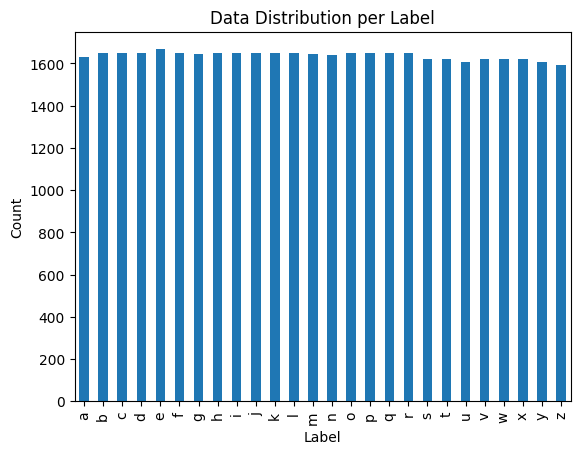

In [ ]:
# @title <p> Visualize imbalanced data
df_normalized['label'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Data Distribution per Label')
plt.show()

# SPLIT DATA

In [ ]:
# @title <p> Drop the unwanted columns
df_normalized.columns
df_normalized.drop(columns=['name', 'file', "max_1", "min_1", "max_2", "min_2", "max_3", "min_3", "max_4", "min_4", "max_5", "min_5"], axis=-1, inplace=True)
df_normalized

,finger1,finger2,finger3,finger4,finger5,label
0,0.369,0.375,0.821,0.634,0.458,o
1,0.367,0.374,0.876,0.661,0.458,o
2,0.377,0.374,0.855,0.646,0.458,o
3,0.369,0.372,0.822,0.628,0.458,o
4,0.369,0.372,0.816,0.626,0.458,o
...,...,...,...,...,...,...
42610,0.666,0.753,0.804,0.787,0.314,j
42611,0.666,0.751,0.796,0.788,0.308,j
42612,0.667,0.753,0.801,0.786,0.316,j
42613,0.664,0.751,0.797,0.779,0.315,j


In [ ]:
# @title <p> One hot encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_normalized['label'])
df_normalized.drop(columns=['label'], axis=-1, inplace=True)

# Convert integer labels to one-hot encoding
y_one_hot = to_categorical(y_encoded)

In [ ]:
# Check wether the encoder result match the total alphabet (26 label in y axis)
print(
  np.unique(y_one_hot, axis=1).shape,
)

(42584, 26)


In [ ]:
# @title <p> Create sequence for dataset
def create_sequences(X, y, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i+seq_length].values)
        y_seq.append(y[i+seq_length-1])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 35

X_seq, y_seq = create_sequences(df_normalized, y_one_hot, seq_length=SEQ_LENGTH)

In [ ]:
print(
    X_seq.shape,
    y_seq.shape,
)

(42550, 35, 5) (42550, 26)


In [ ]:
# @title <p> Split the data to train, test, val
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# TRAINING DATA

In [ ]:
# @title <p> Create Model Architecture
class LSTM_SIBI():
  def __init__(self, X_train, y_train, X_test, y_test, X_val, y_val, epochs: int=100, batch_size: int=32, lr: float=0.005):
    self.train_x_data = X_train
    self.train_y_data = y_train
    self.test_x_data = X_test
    self.test_y_data = y_test
    self.val_x_data = X_val
    self.val_y_data = y_val
    self.epochs = epochs
    self.batch_size = batch_size
    self.lr = lr
    self.model = self.model_arch()

  def model_arch(self):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, 5)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    # First Dense layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(26, activation='softmax'))

    return model

  def model_train(self):
    self.model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=self.lr), metrics=['accuracy'])

    lr_reducer = ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001, verbose=1
    )

    checkpoint = ModelCheckpoint(
        filepath="saved-models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras",
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='max'
    )

    log_csv = CSVLogger(
        "model_flex_log.csv",
        separator = ",",
        append = False
    )

    history = self.model.fit(
        self.train_x_data,
        self.train_y_data,
        validation_data = (self.val_x_data, self.val_y_data),
        epochs = self.epochs,
        batch_size = self.batch_size,
        callbacks=[lr_reducer, checkpoint]
        )
    return history

  def evaluate(self):
      return self.model.evaluate(self.test_x_data, self.test_y_data)

  def model_run(self):
    history = self.model_train()
    test_loss, test_acc = self.evaluate()
    print(f"\n Test Accuracy: {test_acc:.4f}")

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return self.model

Epoch 1/100
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2755 - loss: 2.3538
Epoch 1: val_accuracy improved from -inf to 0.49542, saving model to saved-models/weights-improvement-01-0.50.keras
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 132s 118ms/step - accuracy: 0.2756 - loss: 2.3534 - val_accuracy: 0.4954 - val_loss: 1.4190 - learning_rate: 5.0000e-04
Epoch 2/100
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4986 - loss: 1.4343
Epoch 2: val_accuracy improved from 0.49542 to 0.59271, saving model to saved-models/weights-improvement-02-0.59.keras
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.4986 - loss: 1.4342 - val_accuracy: 0.5927 - val_loss: 1.1415 - learning_rate: 5.0000e-04
Epoch 3/100
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5730 - loss: 1.1831
Epoch 3: val_accuracy improved from 0.59271 to 0.59835, saving model to saved-models/weights-improvement-03-0.60.keras
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 138s 116ms/step - accuracy: 0.5731 - los

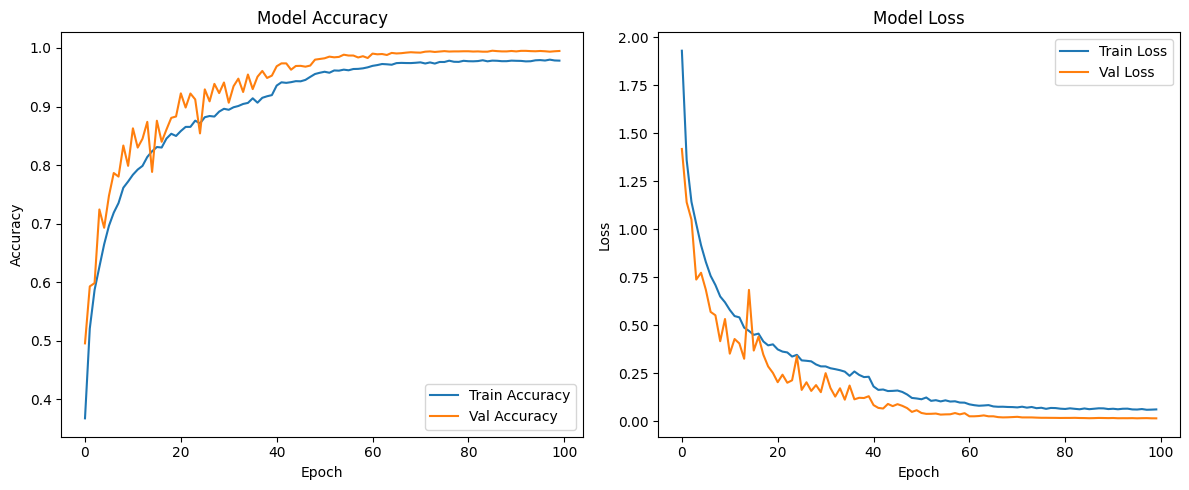

<Sequential name=sequential_2, built=True>

In [ ]:
# @title <p> Train Model
EPOCH = 150 #@param{type: 'integer'}
BATCH_SIZE = 32 #@param{type: 'integer'}
LEARNING_RATE = 0.0005

ml = LSTM_SIBI(X_train, y_train, X_test, y_test, X_val, y_val, epochs=EPOCH, batch_size=BATCH_SIZE, lr=LEARNING_RATE)
ml.model_run()

# EXPORT ITEMS

In [ ]:
ml.model.save('lstm_flex_model.h5')

In [ ]:
from google.colab import files
files.download('lstm_flex_model.h5')
files.download('model_flex_log.csv')
files.download('saved-flex-models')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: model_log.csv

# LOAD AND TEST MODEL

In [ ]:
model = load_model('lstm_flex_model.h5')

In [ ]:
predicted = model.predict(X_test)

133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


In [ ]:
y_pred = np.argmax(predicted, axis=1)
y_true = np.argmax(y_test, axis=1)

# Count matching values
correct_count = np.sum(y_pred == y_true)
print("Total test data", len(y_test))
print("Number of correct predictions:", correct_count)
print("Correct prediction/Total data:", correct_count/len(y_test))

Total test data 4255
Number of correct predictions: 4225
Correct prediction/Total data: 0.9929494712103408
